In [1]:
"""
Purpose: Multilabel Random Forest Classifier Chain
Date: 27/12/2018
Author: Hasnain
"""

'\nPurpose: Multilabel Random Forest Classifier Chain\nDate: 27/12/2018\nAuthor: Hasnain\n'

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import pickle

%matplotlib inline

C:\Users\hasna\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#import label information
label_info_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\NumericalData\\labels.csv'
label_df = pd.read_csv(label_info_path)

In [4]:
#create list of sublabels and labels 
label_list = [x for x in list(label_df.loc[:,'label ']) if len(x) != 0]
for i in range(0, len(label_list)):
    label = label_list[i].strip()
    if len(label) == 0: #sublabel
        label_list[i] = label_df.loc[i, 'sub-label']
    label_list[i] = label_list[i].strip()

In [5]:
#IMPORT DATA

#emotion label path
hobbit_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\NumericalData\\labels\\Hobbit.csv'
buddy_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\NumericalData\\labels\\Buddy.csv'
machete_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\NumericalData\\labels\\Machete.csv'
walter_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\NumericalData\\labels\\Mitty.csv'
paranormalactivity_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\NumericalData\\labels\\Paranormal.csv'
hungergames_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\NumericalData\\labels\\Tribute.csv'

#OUTPUT EMOTION DATAFRAMES
hobbit_emotion_df = pd.read_csv(hobbit_path, header = None).T
buddy_emotion_df = pd.read_csv(buddy_path, header = None).T
machete_emotion_df = pd.read_csv(machete_path, header = None).T
walter_emotion_df = pd.read_csv(walter_path, header = None).T
paranormalactivity_emotion_df = pd.read_csv(paranormalactivity_path, header = None).T
hungergames_emotion_df = pd.read_csv(hungergames_path, header = None).T
#add header to emotion dataframe
hobbit_emotion_df.columns = label_list
buddy_emotion_df.columns = label_list
machete_emotion_df.columns = label_list
walter_emotion_df.columns = label_list
paranormalactivity_emotion_df.columns = label_list
hungergames_emotion_df.columns = label_list

#audio data path
hobbit_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Audio\\Extended Audio Features\\Hobbit2_Audio.p'
buddy_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Audio\\Extended Audio Features\\Buddy_Audio.p'
machete_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Audio\\Extended Audio Features\\Machete_Audio.p'
walter_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Audio\\Extended Audio Features\\Walter_Audio.p'
paranormalactivity_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Audio\\Extended Audio Features\\ParanormalActivity_Audio.p'
hungergames_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Audio\\Extended Audio Features\\TheHungerGames-CatchingFire_Audio.p'
#import audio features
hobbit_audio_features = pickle.load(open(hobbit_path,  "rb"))
buddy_audio_features = pickle.load(open(buddy_path,  "rb"))
machete_audio_features = pickle.load(open(machete_path,  "rb"))
walter_audio_features = pickle.load(open(walter_path,  "rb"))
paranormalactivity_audio_features = pickle.load(open(paranormalactivity_path,  "rb"))
hungergames_audio_features = pickle.load(open(hungergames_path,  "rb"))

#subtitle data path
hobbit_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Subtitle\\Subtitle-TheHobbit2.p'
buddy_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Subtitle\\Subtitle-Buddy.p'
machete_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Subtitle\\Subtitle-Machete.p'
walter_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Subtitle\\Subtitle-Walter.p'
paranormalactivity_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Subtitle\\Subtitle-ParanormalActivity.p'
hungergames_path = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Subtitle\\Subtitle-HungerGames.p'
#import subtitle data
hobbit_sub = pickle.load(open(hobbit_path,  "rb"))
buddy_sub = pickle.load(open(buddy_path,  "rb"))
machete_sub = pickle.load(open(machete_path,  "rb"))
walter_sub = pickle.load(open(walter_path,  "rb"))
paranormalactivity_sub =  pickle.load(open(paranormalactivity_path,  "rb"))
hungergames_sub = pickle.load(open(hungergames_path,  "rb"))

#colour data path
hobbit_path = "C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Colour List\\hobbit_colour_list"
buddy_path = "C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Colour List\\buddy_colour_list"
machete_path = "C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Colour List\\machete_colour_list"
walter_path = "C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Colour List\\walter_colour_list"
paranormalactivity_path = "C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Colour List\\paranormal_colour_list"
hungergames_path = "C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\Colour List\\hunger_colour_list"
#import colour data
hobbit_colour = pickle.load(open(hobbit_path, "rb"))
buddy_colour = pickle.load(open(buddy_path, "rb"))
machete_colour = pickle.load(open(machete_path,  "rb"))
walter_colour = pickle.load(open(walter_path,  "rb"))
paranormalactivity_colour = pickle.load(open(paranormalactivity_path,  "rb"))
hungergames_colour = pickle.load(open(hungergames_path,  "rb"))

In [6]:
#AUDIO
hobbit_audio_features = hobbit_audio_features[0:hobbit_emotion_df.shape[0]]
buddy_audio_features = buddy_audio_features[0:buddy_emotion_df.shape[0]]
machete_audio_features = machete_audio_features[0:machete_emotion_df.shape[0]]
walter_audio_features = walter_audio_features[0:walter_emotion_df.shape[0]]
paranormalactivity_audio_features = paranormalactivity_audio_features[0:paranormalactivity_emotion_df.shape[0]]
hungergames_audio_features = hungergames_audio_features[0:hungergames_emotion_df.shape[0]]

log_mel_channels = 128
chroma_channels = 12
tempo_channels = 1
mfcc_channels = 40
centroid_channels = 1
contrast_channels = 7
tonnetz_channels = 6

#create coloumn titles

log_mel_cols = ['log mel ' + str(x) for x in range(0,log_mel_channels)]
chroma_cols = ['chroma ' + str(x) for x in range(0,chroma_channels)]
tempo_cols = ['tempo']
mfcc_cols = ['mfcc ' + str(x) for x in range(0,mfcc_channels)]
centroid_cols = ['centroid']
contrast_cols = ['contrast ' + str(x) for x in range(0,contrast_channels)]
tonnetz_cols = ['tonnetz ' + str(x) for x in range(0,tonnetz_channels)]

audio_cols = log_mel_cols + chroma_cols + tempo_cols + mfcc_cols + centroid_cols + contrast_cols + tonnetz_cols

hobbit_input_df = pd.DataFrame(columns=audio_cols)
for i in range(0,len(hobbit_audio_features)):
    features = hobbit_audio_features[i]
    log_mel = list(features['log_mel'])
    chroma = list(features['chroma'])
    tempo = [features['tempo']]
    mfcc = list(features['mfcc'])
    centroid = list(features['spec_centroid'])
    contrast = list(features['spec_contrast'])
    tonnetz = list(features['tonnetz'])
    audio_features = log_mel + chroma + tempo + mfcc + centroid + contrast + tonnetz
    hobbit_input_df.loc[i] = audio_features

buddy_input_df = pd.DataFrame(columns=audio_cols)
for i in range(0,len(buddy_audio_features)):
    features = buddy_audio_features[i]
    log_mel = list(features['log_mel'])
    chroma = list(features['chroma'])
    tempo = [features['tempo']]
    mfcc = list(features['mfcc'])
    centroid = list(features['spec_centroid'])
    contrast = list(features['spec_contrast'])
    tonnetz = list(features['tonnetz'])
    audio_features = log_mel + chroma + tempo + mfcc + centroid + contrast + tonnetz
    buddy_input_df.loc[i] = audio_features
            
machete_input_df = pd.DataFrame(columns=audio_cols)
for i in range(0,len(machete_audio_features)):
    features = machete_audio_features[i]
    log_mel = list(features['log_mel'])
    chroma = list(features['chroma'])
    tempo = [features['tempo']]
    mfcc = list(features['mfcc'])
    centroid = list(features['spec_centroid'])
    contrast = list(features['spec_contrast'])
    tonnetz = list(features['tonnetz'])
    audio_features = log_mel + chroma + tempo + mfcc + centroid + contrast + tonnetz
    machete_input_df.loc[i] = audio_features
    
walter_input_df = pd.DataFrame(columns=audio_cols)
for i in range(0,len(walter_audio_features)):
    features = walter_audio_features[i]
    log_mel = list(features['log_mel'])
    chroma = list(features['chroma'])
    tempo = [features['tempo']]
    mfcc = list(features['mfcc'])
    centroid = list(features['spec_centroid'])
    contrast = list(features['spec_contrast'])
    tonnetz = list(features['tonnetz'])
    audio_features = log_mel + chroma + tempo + mfcc + centroid + contrast + tonnetz
    walter_input_df.loc[i] = audio_features

paranormalActivity_input_df = pd.DataFrame(columns=audio_cols)
for i in range(0,len(paranormalactivity_audio_features)):
    features = paranormalactivity_audio_features[i]
    log_mel = list(features['log_mel'])
    chroma = list(features['chroma'])
    tempo = [features['tempo']]
    mfcc = list(features['mfcc'])
    centroid = list(features['spec_centroid'])
    contrast = list(features['spec_contrast'])
    tonnetz = list(features['tonnetz'])
    audio_features = log_mel + chroma + tempo + mfcc + centroid + contrast + tonnetz
    paranormalActivity_input_df.loc[i] = audio_features

hungergames_input_df = pd.DataFrame(columns=audio_cols)
for i in range(0,len(hungergames_audio_features)):
    features = hungergames_audio_features[i]
    log_mel = list(features['log_mel'])
    chroma = list(features['chroma'])
    tempo = [features['tempo']]
    mfcc = list(features['mfcc'])
    centroid = list(features['spec_centroid'])
    contrast = list(features['spec_contrast'])
    tonnetz = list(features['tonnetz'])
    audio_features = log_mel + chroma + tempo + mfcc + centroid + contrast + tonnetz
    hungergames_input_df.loc[i] = audio_features

In [7]:
#COLOUR 

#slice the colour lists to size
hobbit_colour = hobbit_colour[0:hobbit_emotion_df.shape[0]]
buddy_colour = buddy_colour[0:buddy_emotion_df.shape[0]]
machete_colour = machete_colour[0:machete_emotion_df.shape[0]]
walter_colour = walter_colour[0:walter_emotion_df.shape[0]]
paranormalactivity_colour = paranormalactivity_colour[0:paranormalactivity_emotion_df.shape[0]]
hungergames_colour = hungergames_colour[0:hungergames_emotion_df.shape[0]]

#create r g b coloumns 
red_list = list()
blue_list = list()
green_list = list()
for i in range(0,len(hobbit_colour)):
    red,green,blue = hobbit_colour[i]
    red_list.append(red)
    green_list.append(green)
    blue_list.append(blue)
hobbit_input_df['R'] = red_list
hobbit_input_df['G'] = green_list
hobbit_input_df['B'] = blue_list


red_list = list()
blue_list = list()
green_list = list()
for i in range(0,len(buddy_colour)):
    red,green,blue = buddy_colour[i]
    red_list.append(red)
    green_list.append(green)
    blue_list.append(blue)
buddy_input_df['R'] = red_list
buddy_input_df['G'] = green_list
buddy_input_df['B'] = blue_list

red_list = list()
blue_list = list()
green_list = list()
for i in range(0,len(machete_colour)):
    red,green,blue = machete_colour[i]
    red_list.append(red)
    green_list.append(green)
    blue_list.append(blue)
machete_input_df['R'] = red_list
machete_input_df['G'] = green_list
machete_input_df['B'] = blue_list

red_list = list()
blue_list = list()
green_list = list()
for i in range(0,len(walter_colour)):
    red,green,blue = walter_colour[i]
    red_list.append(red)
    green_list.append(green)
    blue_list.append(blue)
walter_input_df['R'] = red_list
walter_input_df['G'] = green_list
walter_input_df['B'] = blue_list

red_list = list()
blue_list = list()
green_list = list()
for i in range(0,len(paranormalactivity_colour)):
    red,green,blue = paranormalactivity_colour[i]
    red_list.append(red)
    green_list.append(green)
    blue_list.append(blue)
paranormalActivity_input_df['R'] = red_list
paranormalActivity_input_df['G'] = green_list
paranormalActivity_input_df['B'] = blue_list

red_list = list()
blue_list = list()
green_list = list()
for i in range(0,len(hungergames_colour)):
    red,green,blue = hungergames_colour[i]
    red_list.append(red)
    green_list.append(green)
    blue_list.append(blue)
hungergames_input_df['R'] = red_list
hungergames_input_df['G'] = green_list
hungergames_input_df['B'] = blue_list

In [8]:
#SUBTITLE 
hobbit_input_df['Sentiment'] = hobbit_sub
buddy_input_df['Sentiment'] = buddy_sub
machete_input_df['Sentiment'] = machete_sub
walter_input_df['Sentiment'] = walter_sub
paranormalActivity_input_df['Sentiment'] = paranormalactivity_sub
hungergames_input_df['Sentiment'] = hungergames_sub

In [9]:
#create entire dataframe
hobbit_df = pd.concat([hobbit_input_df,hobbit_emotion_df], axis = 1)
buddy_df = pd.concat([buddy_input_df, buddy_emotion_df], axis=1)
machete_df = pd.concat([machete_input_df, machete_emotion_df], axis = 1)
walter_df = pd.concat([walter_input_df, walter_emotion_df], axis = 1)
paranormalactivity_df = pd.concat([paranormalActivity_input_df,paranormalactivity_emotion_df], axis = 1)
hungergames_df = pd.concat([hungergames_input_df, hungergames_emotion_df], axis = 1)

#create an input dataframe
frames = [hobbit_input_df, buddy_input_df,machete_input_df,walter_input_df,paranormalActivity_input_df,hungergames_input_df]
df_features = pd.concat(frames)

#create an output dataframe
frames = [hobbit_emotion_df, buddy_emotion_df,machete_emotion_df,walter_emotion_df,paranormalactivity_emotion_df,hungergames_emotion_df]
df_labels = pd.concat(frames)

In [10]:
#create training and test datasets
train, test, train_labels, test_labels = train_test_split(df_features, df_labels, test_size= 0.20) #80 20 train test split

In [11]:
#create the model and the chains 
number_of_chains = 20
base_lr = RandomForestClassifier(n_estimators = 1000)
chains = [ClassifierChain(base_lr, order='random', random_state=i) for i in range(number_of_chains)]

for chain in chains:
    chain.fit(train, train_labels)

In [12]:
pred_chains = np.array([chain.predict(test) for chain in chains])

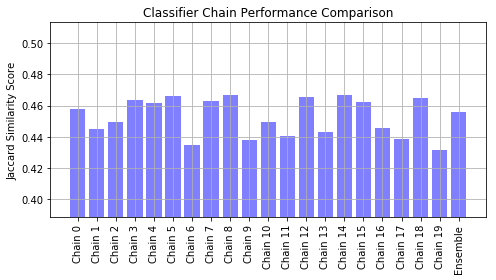

In [13]:
#JACCARD SCORES

chain_jaccard_scores = [metrics.jaccard_similarity_score(test_labels.values, pred_chain >= .5) for pred_chain in pred_chains]
pred_ensemble = pred_chains.mean(axis=0)
ensemble_jaccard_score = metrics.jaccard_similarity_score(test_labels.values, pred_ensemble >= .5)
model_scores = chain_jaccard_scores + [ensemble_jaccard_score]

model_names = ['Chain ' + str(x) for x in range(number_of_chains)]
model_names = model_names + ['Ensemble']

x_pos = np.arange(len(model_names))
fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title('Classifier Chain Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
colors = ['b'] * len(model_names)
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()